In [13]:
# 이미지 예측 테스트
import os

# 이미지 경로 가져오기
IMG_DIR = './Images/'

IMG_LIST = os.listdir(IMG_DIR)
print(f'IMG_LIST => {IMG_LIST}')

IMG_LIST = [IMG_DIR + filename for filename in IMG_LIST if filename.endswith('.jpg')]
print(f'IMG_LIST => {IMG_LIST}')

IMG_LIST => ['1.jfif', '2.jfif', '3.jfif', '4.jfif', '5.jfif', '6.jfif', '7.jfif', '8.jfif', 'KakaoTalk_20250422_095506330.jpg', 'KakaoTalk_20250422_095506330_01 (1).jpg', 'KakaoTalk_20250422_095506330_01.jpg', 'KakaoTalk_20250422_095506330_02.jpg', 'KakaoTalk_20250422_095506330_03.jpg', 'KakaoTalk_20250422_095506330_04.jpg', 'KakaoTalk_20250422_095506330_05.jpg', 'KakaoTalk_20250422_095506330_06.jpg', 'KakaoTalk_20250422_124811768.jpg', 'KakaoTalk_20250422_124954833.jpg']
IMG_LIST => ['./Images/KakaoTalk_20250422_095506330.jpg', './Images/KakaoTalk_20250422_095506330_01 (1).jpg', './Images/KakaoTalk_20250422_095506330_01.jpg', './Images/KakaoTalk_20250422_095506330_02.jpg', './Images/KakaoTalk_20250422_095506330_03.jpg', './Images/KakaoTalk_20250422_095506330_04.jpg', './Images/KakaoTalk_20250422_095506330_05.jpg', './Images/KakaoTalk_20250422_095506330_06.jpg', './Images/KakaoTalk_20250422_124811768.jpg', './Images/KakaoTalk_20250422_124954833.jpg']


클래스 이름 → 인덱스: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
인덱스 → 클래스 이름: {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


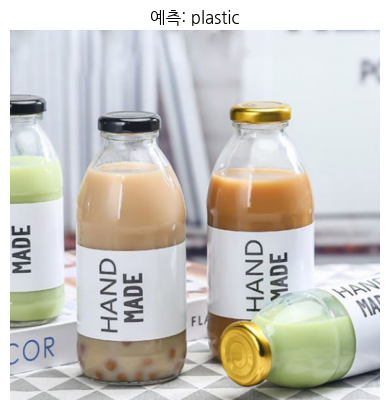

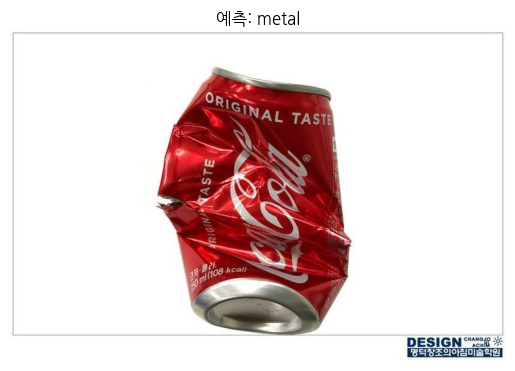

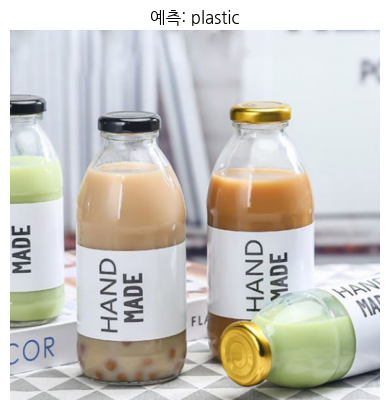

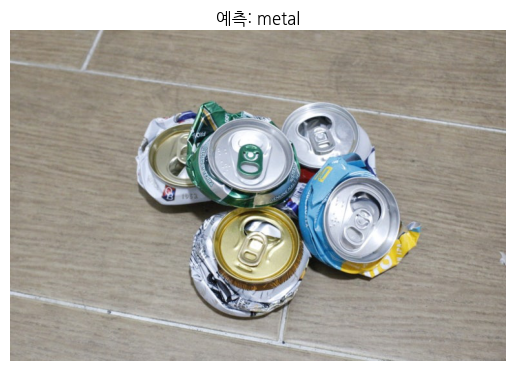

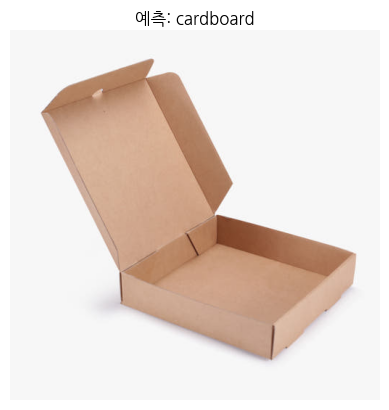

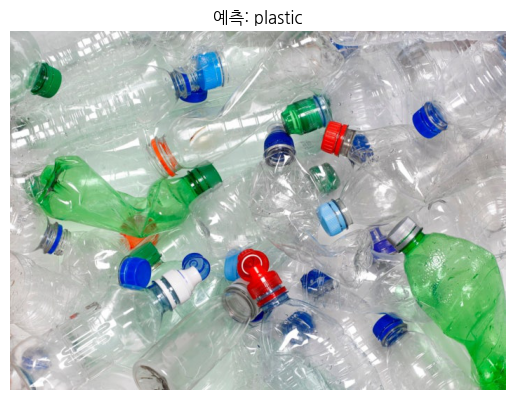

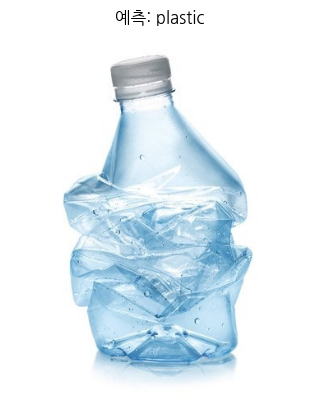

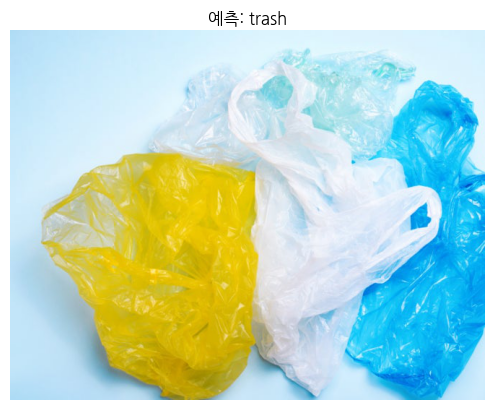

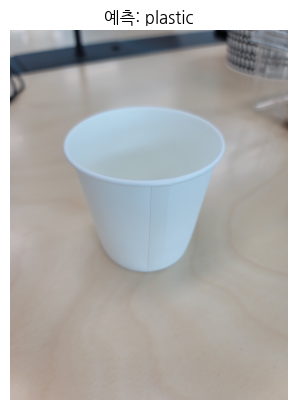

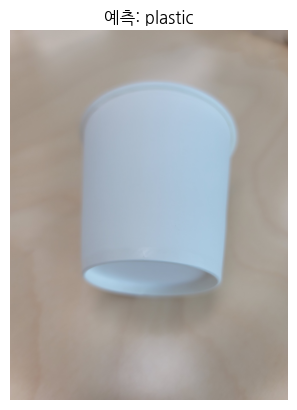

In [14]:
# 학습에 사용한 전처리 동일 적용
import torch
from torchvision import models, transforms
from torchvision.models import VGG16_Weights  # ✅ weights 옵션을 쓰려면 필요
from PIL import Image
import os
import matplotlib.pyplot as plt
import koreanize_matplotlib

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48235, 0.45882, 0.40784],
                         std=[0.229, 0.224, 0.225])
])

from torchvision.datasets import ImageFolder

# 하이퍼파라미터에 정의된 transform 사용
dataset = ImageFolder('../Project/dataset-resized')

# 클래스 인덱스 → 이름 (예: 0: 'can')
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

print("클래스 이름 → 인덱스:", dataset.class_to_idx)
print("인덱스 → 클래스 이름:", idx_to_class)


# VGG16 모델 로딩 및 수정
# 사전 학습된 VGG19 모델 불러오기
model = models.vgg19(weights='VGG19_Weights.IMAGENET1K_V1')
model.classifier[6] = torch.nn.Linear(4096, len(idx_to_class))  # 클래스 수에 맞게 출력층 수정

# 가중치 불러오기
model.load_state_dict(torch.load('./models/VGG19_best_model.pth', map_location=device))
model.to(device)
model.eval()

# 이미지 예측 반복
for img_path in IMG_LIST:
    img = Image.open(img_path).convert("RGB")
    input_tensor = preprocess(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        pred = torch.argmax(output, dim=1).item()

    # 결과 시각화
    plt.imshow(img)
    plt.title(f"예측: {idx_to_class.get(pred, '알 수 없음')}")
    plt.axis('off')
    plt.show()